In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# CIFAR-10 Photo Classification Dataset

CIFAR is an acronym that stands for the Canadian Institute For Advanced Research and the CIFAR-10 dataset was developed along with the CIFAR-100 dataset by researchers at the CIFAR institute.


The dataset is comprised of 60,000 32×32 pixel color photographs of objects from 10 classes, such as frogs, birds, cats, ships, etc. The class labels and their standard associated integer values are listed below.


* 0: airplane

* 1: automobile

* 2: bird

* 3: cat

* 4: deer

* 5: dog

* 6: frog

* 7: horse

* 8: ship

* 9: truck


These are very small images, much smaller than a typical photograph, and the dataset was intended for computer vision research.

In [4]:
x_train[0].shape

(32, 32, 3)

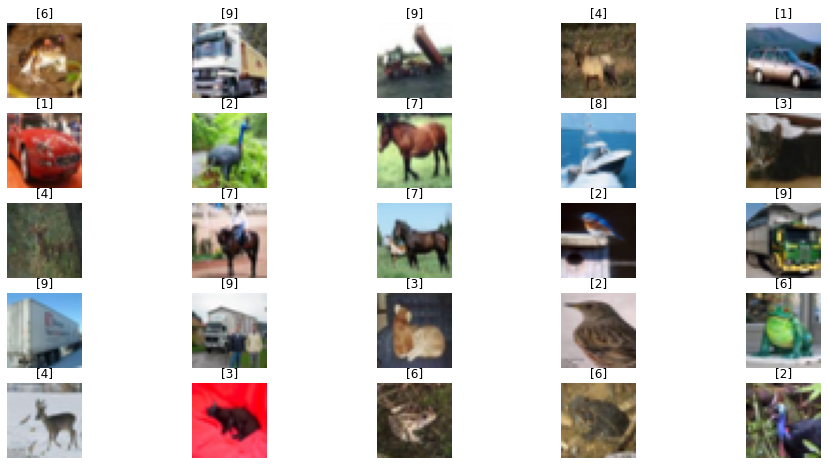

In [ ]:
# create figure
fig = plt.figure(figsize=(16, 8))
  
# setting values to rows and column variables
rows = 5
columns = 5

for i in range(25):
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(x_train[i])
    plt.axis('off')
    plt.title(f'{y_train[i]}')

In [5]:
x_train.shape

(50000, 32, 32, 3)

In [6]:
x_train[0].max()

255

In [7]:
x_train = x_train/255

In [8]:
x_test = x_test/255

In [9]:
x_test.shape

(10000, 32, 32, 3)

In [10]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [11]:
from tensorflow.keras.utils import to_categorical

In [12]:
y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [14]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape = (32,32,3), activation='relu'))


model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))


model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))

# Output layer

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam',
             metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 32)        25632     
                                                                 
 conv2d_3 (Conv2D)           (None, 6, 6, 32)          25632     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 3, 3, 32)         0         
 2D)                                                    

In [16]:
from tensorflow.keras.callbacks import EarlyStopping

In [17]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [18]:
model.fit(x_train, y_cat_train,epochs=15,
         validation_data=(x_test, y_cat_test), callbacks=[early_stop])

Epoch 1/15
1563/1563 [==============================] - 125s 76ms/step - loss: 1.5330 - accuracy: 0.4362 - val_loss: 1.2340 - val_accuracy: 0.5581
Epoch 2/15
1563/1563 [==============================] - 144s 92ms/step - loss: 1.1635 - accuracy: 0.5876 - val_loss: 1.1284 - val_accuracy: 0.5948
Epoch 3/15
1563/1563 [==============================] - 140s 89ms/step - loss: 1.0130 - accuracy: 0.6384 - val_loss: 0.9881 - val_accuracy: 0.6484
Epoch 4/15
1563/1563 [==============================] - 113s 72ms/step - loss: 0.9006 - accuracy: 0.6823 - val_loss: 0.9356 - val_accuracy: 0.6731
Epoch 5/15
1563/1563 [==============================] - 110s 70ms/step - loss: 0.8188 - accuracy: 0.7123 - val_loss: 0.8841 - val_accuracy: 0.6895
Epoch 6/15
1563/1563 [==============================] - 117s 75ms/step - loss: 0.7535 - accuracy: 0.7348 - val_loss: 0.8650 - val_accuracy: 0.7023
Epoch 7/15
1563/1563 [==============================] - 114s 73ms/step - loss: 0.7026 - accuracy: 0.7517 - val_loss: 0

In [19]:
metrics = pd.DataFrame(model.history.history)

<AxesSubplot: >

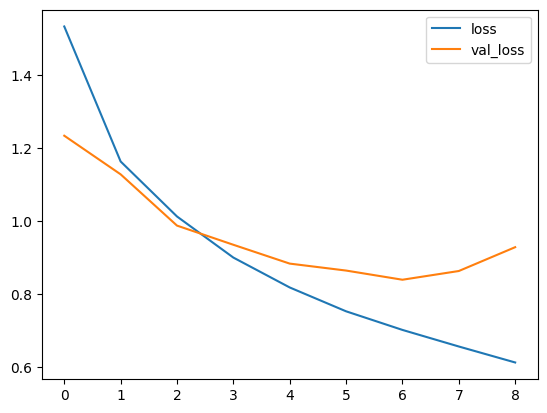

In [20]:
metrics[['loss', 'val_loss']].plot()

<AxesSubplot: >

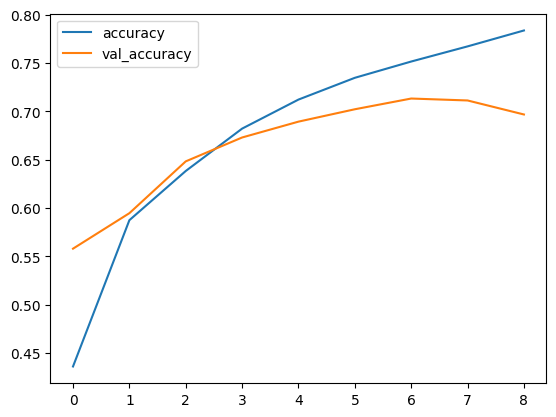

In [21]:
metrics[['accuracy', 'val_accuracy']].plot()

In [22]:
model.evaluate(x_test, y_cat_test)

313/313 [==============================] - 5s 14ms/step - loss: 0.9290 - accuracy: 0.6969


[0.9289977550506592, 0.6969000101089478]

In [23]:
from sklearn.metrics import classification_report, confusion_matrix

In [24]:
prediction = model.predict(x_test)

313/313 [==============================] - 8s 14ms/step


In [25]:
predictions = [np.argmax(x, axis=0) for x in prediction]

In [26]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.77      0.66      0.71      1000
           1       0.86      0.84      0.85      1000
           2       0.56      0.59      0.57      1000
           3       0.52      0.41      0.46      1000
           4       0.65      0.69      0.67      1000
           5       0.50      0.77      0.61      1000
           6       0.90      0.65      0.75      1000
           7       0.77      0.75      0.76      1000
           8       0.74      0.86      0.79      1000
           9       0.88      0.76      0.81      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000



In [ ]:
confusion_matrix(y_test, predictions)

array([[777,  32,  64,  17,  14,   9,  13,   6,  41,  27],
       [  7, 881,   4,   8,   2,   6,  17,   4,  22,  49],
       [ 71,   7, 581,  48,  67,  99,  88,  30,   7,   2],
       [ 28,   9,  45, 447,  49, 285,  92,  25,   9,  11],
       [ 20,   4,  69,  56, 631,  66,  74,  71,   7,   2],
       [ 18,   5,  41,  99,  26, 748,  32,  22,   4,   5],
       [  6,   2,  28,  45,  22,  32, 853,   5,   5,   2],
       [ 18,   1,  35,  36,  45, 124,  14, 713,   3,  11],
       [118,  47,  14,  21,   2,   6,  13,   4, 746,  29],
       [ 35,  98,   9,  16,   4,   6,  16,   8,  19, 789]])

In [27]:
import seaborn as sns

<AxesSubplot: >

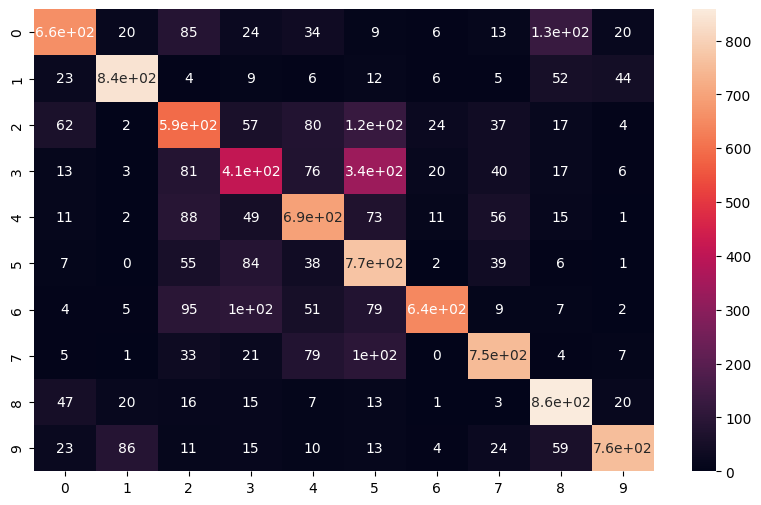

In [28]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, predictions),annot=True)

In [29]:
my_image = x_test[16]

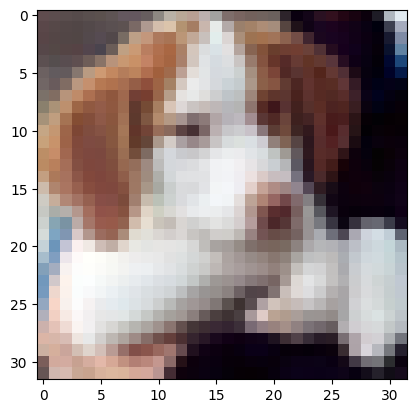

In [30]:
plt.imshow(my_image)

In [31]:
y_test[16]

array([5], dtype=uint8)

In [32]:
x_train.shape

(50000, 32, 32, 3)

In [33]:
model.predict(my_image.reshape(1,32,32,3))

1/1 [==============================] - 0s 267ms/step


array([[2.57487920e-09, 9.81185799e-10, 2.51715464e-05, 2.42457885e-04,
        1.01054753e-09, 9.99727905e-01, 5.80103032e-09, 4.30230011e-06,
        1.54283157e-07, 1.15754635e-10]], dtype=float32)

In [34]:
def predict_classes(image):
    prediction = model.predict(image)
    return np.argmax(prediction, axis=1)

In [ ]:
predict_classes(my_image.reshape(1,32,32,3))

1/1 [==============================] - 0s 13ms/step


array([5])

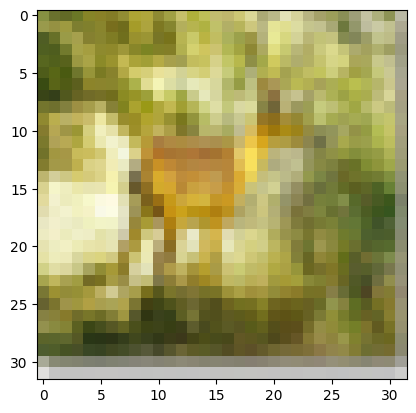

In [35]:
plt.imshow(x_test[500])

In [36]:
y_test[500]

array([4], dtype=uint8)

In [37]:
predict_classes(x_test[500].reshape(1,32,32,3))

1/1 [==============================] - 0s 28ms/step


array([4], dtype=int64)

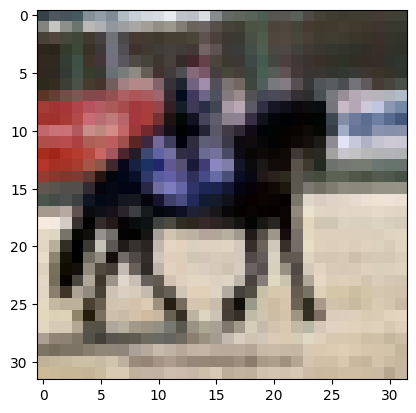

In [38]:
plt.imshow(x_test[5000])

In [39]:
y_test[5000]

array([7], dtype=uint8)

In [40]:
predict_classes(x_test[5000].reshape(1,32,32,3))

1/1 [==============================] - 0s 43ms/step


array([7], dtype=int64)

In [41]:
model.save('cnn_acc_71.h5')

In [43]:
import tensorflow as tf

In [44]:
model_saved = tf.keras.models.load_model('cnn_acc_71.h5')

In [45]:
model_saved